In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv("Time_Series/item1213.csv").iloc[:, 2:]
data.columns = ['M0', 'qty1', 'qty2', 'qty3']
M0, M1, M2, M3 = data['M0'], [], [], []
M_1, M_2, M_3 = [], [], []
# for i in range(3, len(data)):
#     M_1.append(M0[i-1])
#     M_2.append(M0[i-2])
#     M_3.append(M0[i-3])
for i in range(len(data)-3):
    M1.append(M0[i+1])
    M2.append(M0[i+2])
    M3.append(M0[i+3])
data = data.drop(['M0'], axis=1).iloc[:44, :]
# data['M_1'], data['M_2'], data['M_3'] = M_1, M_2, M_3
data['M0'], data['M1'], data['M2'], data['M3'] = M0, M1, M2, M3

In [58]:
len(data)

44

In [4]:
X, y = data.iloc[:, :3].values, data.iloc[:, 3:].values
x_train = []
y_train = []
for i in range(10,40):
    x_train.append(X[i-10:i, :3])
    y_train.append(y[i,:])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(30, 10, 3) (30, 4)


In [5]:
x_train

array([[[0.1952, 0.    , 0.    ],
        [0.0905, 0.1132, 0.    ],
        [0.3918, 0.0184, 0.    ],
        [0.1174, 0.    , 0.    ],
        [0.1132, 0.    , 0.    ],
        [0.0481, 0.    , 0.    ],
        [0.1047, 0.    , 0.    ],
        [0.0679, 0.0085, 0.    ],
        [0.0283, 0.    , 0.    ],
        [0.0552, 0.0849, 0.    ]],

       [[0.0905, 0.1132, 0.    ],
        [0.3918, 0.0184, 0.    ],
        [0.1174, 0.    , 0.    ],
        [0.1132, 0.    , 0.    ],
        [0.0481, 0.    , 0.    ],
        [0.1047, 0.    , 0.    ],
        [0.0679, 0.0085, 0.    ],
        [0.0283, 0.    , 0.    ],
        [0.0552, 0.0849, 0.    ],
        [0.553 , 0.0099, 0.    ]],

       [[0.3918, 0.0184, 0.    ],
        [0.1174, 0.    , 0.    ],
        [0.1132, 0.    , 0.    ],
        [0.0481, 0.    , 0.    ],
        [0.1047, 0.    , 0.    ],
        [0.0679, 0.0085, 0.    ],
        [0.0283, 0.    , 0.    ],
        [0.0552, 0.0849, 0.    ],
        [0.553 , 0.0099, 0.    ],
        [0

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=30, input_shape = (10,3)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(units=4)
])

model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 30)                1020      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 124       
Total params: 2,074
Trainable params: 2,074
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 30)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 12ms/sample - loss: 0.1740
Epoch 2/100
30/30 [==============================] - 0s 199us/sample - loss: 0.1700
Epoch 3/100
30/30 [==============================] - 0s 199us/sample - loss: 0.1663
Epoch 4/100
30/30 [==============================] - 0s 199us/sample - loss: 0.1628
Epoch 5/100
30/30 [==============================] - 0s 200us/sample - loss: 0.1594
Epoch 6/100
30/30 [==============================] - 0s 199us/sample - loss: 0.1561
Epoch 7/100
30/30 [==============================] - 0s 200us/sample - loss: 0.1527
Epoch 8/100
30/30 [==============================] - 0s 166us/sample - loss: 0.1495
Epoch 9/100
30/30 [==============================] - 0s 166us/sample - loss: 0.1463
Epoch 10/100
30/30 [==============================] - 0s 199us/sample - loss: 0.1431
Epoch 11/100
30/30 [==============================] - 0s 233us/sample - loss: 0.1400
Epoch 12/100
30/30 [==============================] - 0

Epoch 98/100
30/30 [==============================] - 0s 233us/sample - loss: 0.0647
Epoch 99/100
30/30 [==============================] - 0s 233us/sample - loss: 0.0646
Epoch 100/100
30/30 [==============================] - 0s 233us/sample - loss: 0.0645


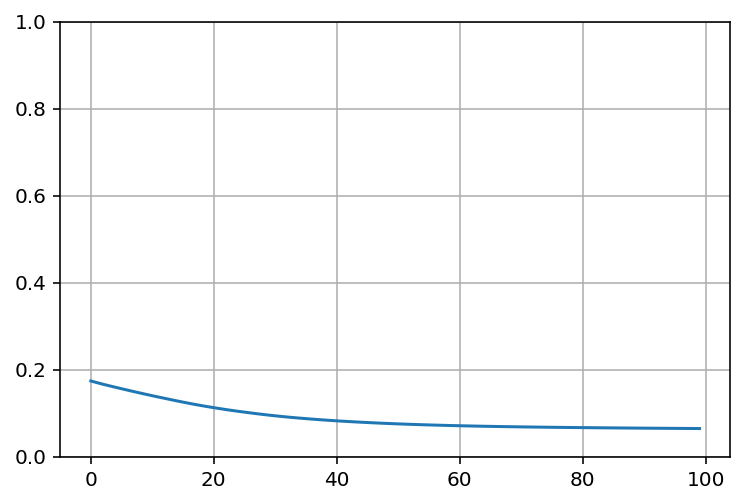

In [62]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
x_test= []
y_test = []
for i in range(40,44):
    x_test.append(X[i-10:i, :3])
    y_test.append(y[i,:])
x_test,y_test = np.array(x_test),np.array(y_test)

In [64]:
y_pred = regressor.predict(x_test)
y_pred

array([[-0.24897355, -0.28957254,  0.23974955, -0.5171675 ],
       [-0.26371306, -0.28087872,  0.3032676 , -0.4827819 ],
       [-0.07222751, -0.34644556,  0.27600852, -0.46749097],
       [-0.10546704, -0.20431456,  0.2837058 , -0.5072467 ]],
      dtype=float32)

In [65]:
y_test

array([[0.1386, 0.3607, 0.2405, 0.4851],
       [0.3607, 0.2405, 0.4851, 0.0948],
       [0.2405, 0.4851, 0.0948, 0.174 ],
       [0.4851, 0.0948, 0.174 , 0.1174]])

In [66]:
acc= []
for i in range(0,4):
    for index, value in enumerate(y_pred[i]): 
      acc.append(min(y_test[i][index], y_pred[i][index])/max(y_test[i][index], y_pred[i][index]))
i=i+1
acc=np.array(acc)
acc.reshape(4,4)

array([[-1.79634595, -0.80280714,  0.99687963, -1.06610494],
       [-0.73111467, -1.1678949 ,  0.62516512, -5.09263594],
       [-0.30032228, -0.71417349,  0.34346766, -2.68672972],
       [-0.21741298, -2.15521687,  0.61331139, -4.32067013]])